In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder # Scaling categorical
from sklearn.preprocessing import StandardScaler #Scaling
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score

In [8]:
df =pd.read_csv("Mall_Customers.csv")
df = df.iloc[:,3:]
sc = StandardScaler()
df = sc.fit_transform(df)

<h3>dendrogram</h3>

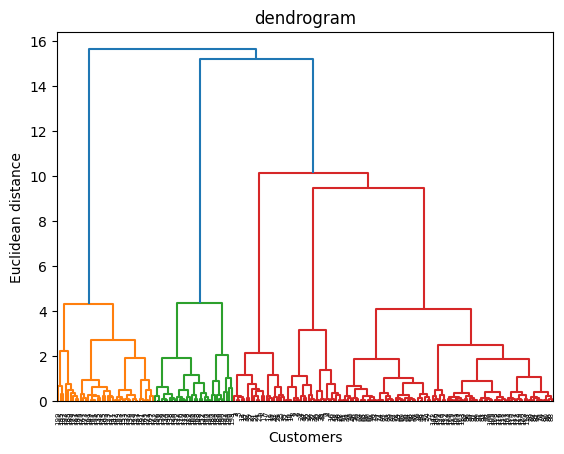

In [9]:
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

<h3>Hierarchical</h3>

In [10]:
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
df_results = hc.fit_predict(df)

<h3>Visualising the clusters</h3>

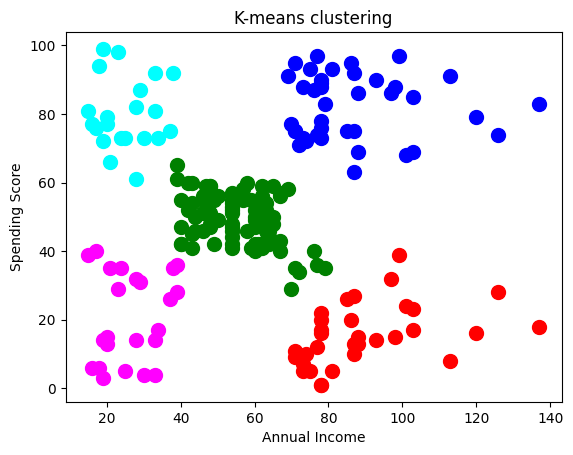

In [11]:
df = sc.inverse_transform(df)
plt.scatter(df[df_results == 0, 0],df[df_results == 0, 1], s = 100, c = 'red', label=f'Cluster 0')
plt.scatter(df[df_results == 1, 0],df[df_results == 1, 1], s = 100, c = 'blue', label=f'Cluster 1')
plt.scatter(df[df_results == 2, 0],df[df_results == 2, 1], s = 100, c = 'green', label=f'Cluster 2')
plt.scatter(df[df_results == 3, 0],df[df_results == 3, 1], s = 100, c = 'cyan', label=f'Cluster 3')
plt.scatter(df[df_results == 4, 0],df[df_results == 4, 1], s = 100, c = 'magenta', label=f'Cluster 4')
plt.title('K-means clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

<h3>Results</h3>

In [12]:
hc_silhouette = silhouette_score(df, df_results)
hc_calinski_harabasz = calinski_harabasz_score(df, df_results)
hc_davies_bouldin = davies_bouldin_score(df, df_results)

print("\nHierarchical Clustering:")
print(f"Silhouette Score: {hc_silhouette}")
print(f"Calinski-Harabasz Index: {hc_calinski_harabasz}")
print(f"Davies-Bouldin Index: {hc_davies_bouldin}")


Hierarchical Clustering:
Silhouette Score: 0.5529945955148897
Calinski-Harabasz Index: 243.07142892964563
Davies-Bouldin Index: 0.5782207452369453
